All features used , general ML algorithms not fine tunealgorithms

In [261]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [262]:
# Import pandas libraries
import pandas as pd

# Load the dataset
data = pd.read_csv("Data/activemq_result.csv", delimiter=',')

# Explore the dataset
print(data.head()) 



                                         Method name  C20  C3  C4  C1  C5  C6  \
0  org.apache.activemq.transport.amqp.AmqpFramePa...    4  10   1   9   2   5   
1  org.apache.activemq.transport.amqp.AmqpHeader....    5   6   0   6   1   3   
2  org.apache.activemq.transport.amqp.AmqpHeader....    1  13   0  13   3   9   
3  org.apache.activemq.transport.amqp.AmqpInactiv...    1   5   0   5   1   3   
4  org.apache.activemq.transport.amqp.AmqpInactiv...    6   9   0   9   1   5   

   C2  C21  C18  ...  H4  H1  H2  H3       H12       H13       H14   H15  H5  \
0   0    2    4  ...   1   2   2   4  0.200000  0.200000  1.000000   4.0   1   
1   0    5    2  ...   1   1   3   4  0.333333  1.000000  0.333333   4.0   1   
2   0    9    3  ...   1  10   0  10  0.769231  0.000000  0.000000  10.0   1   
3   0    3    1  ...   1   2   0   2  0.400000  0.000000  0.000000   2.0   1   
4   0    4    3  ...   1   3   2   5  0.333333  0.222222  1.500000   5.0   1   

       bug-prone  
0  not bug-pr

In [263]:
# Check missing value
data.isna().sum() # get missing value count of each column

# check missing values
data.isnull().values.any() # no missing values


False

In [264]:
import numpy as np

data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check missing value
data.isna().sum() # get missing value count of each column

Method name    0
C20            0
C3             0
C4             0
C1             0
C5             0
C6             0
C2             0
C21            0
C18            0
C8             0
C9             0
C10            0
C17            0
C19            0
C7             0
C11            0
C12            0
C13            0
C14            0
C15            0
C16            0
H6             0
H7             0
H8             0
H9             0
H10            0
H11            0
H16            0
H17            0
H18            0
H19            0
H4             0
H1             0
H2             0
H3             0
H12            0
H13            0
H14            0
H15            0
H5             0
bug-prone      0
dtype: int64

In [265]:
import numpy as np
import pandas as pd

# Calculate percentiles
sl = np.percentile(data['C1'], 75)

# Subset 1: small: C1 <= 50th percentile
data_s = data[data['C1'] <= sl]

# Subset 2: large: C1 > 50th percentile
data_l = data[data['C1'] > sl]


In [266]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

def plot_all_distributions(df):
    # Number of columns in the dataframe
    num_features = df.shape[1]
    
    
    # Create a figure with subplots
    fig, axes = plt.subplots(8, 5, figsize=(15, 24))
    
    # Flatten axes array for easy iteration
    axes = axes.flatten()
    
    # Plot each feature
    for i, column in enumerate(df.columns):
        sns.histplot(df[column], kde=True, stat="density", bins=30, color='blue', alpha=0.6, ax=axes[i])
        sns.kdeplot(df[column], color='red', linewidth=2, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    
    # Hide any unused subplots
    for i in range(len(df.columns), len(axes)):
        axes[i].axis('off')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Select numerical columns only
df_s = data_s.select_dtypes(include=['number']).apply(pd.to_numeric, downcast='float')
df_l = data_l.select_dtypes(include=['number']).apply(pd.to_numeric, downcast='float')



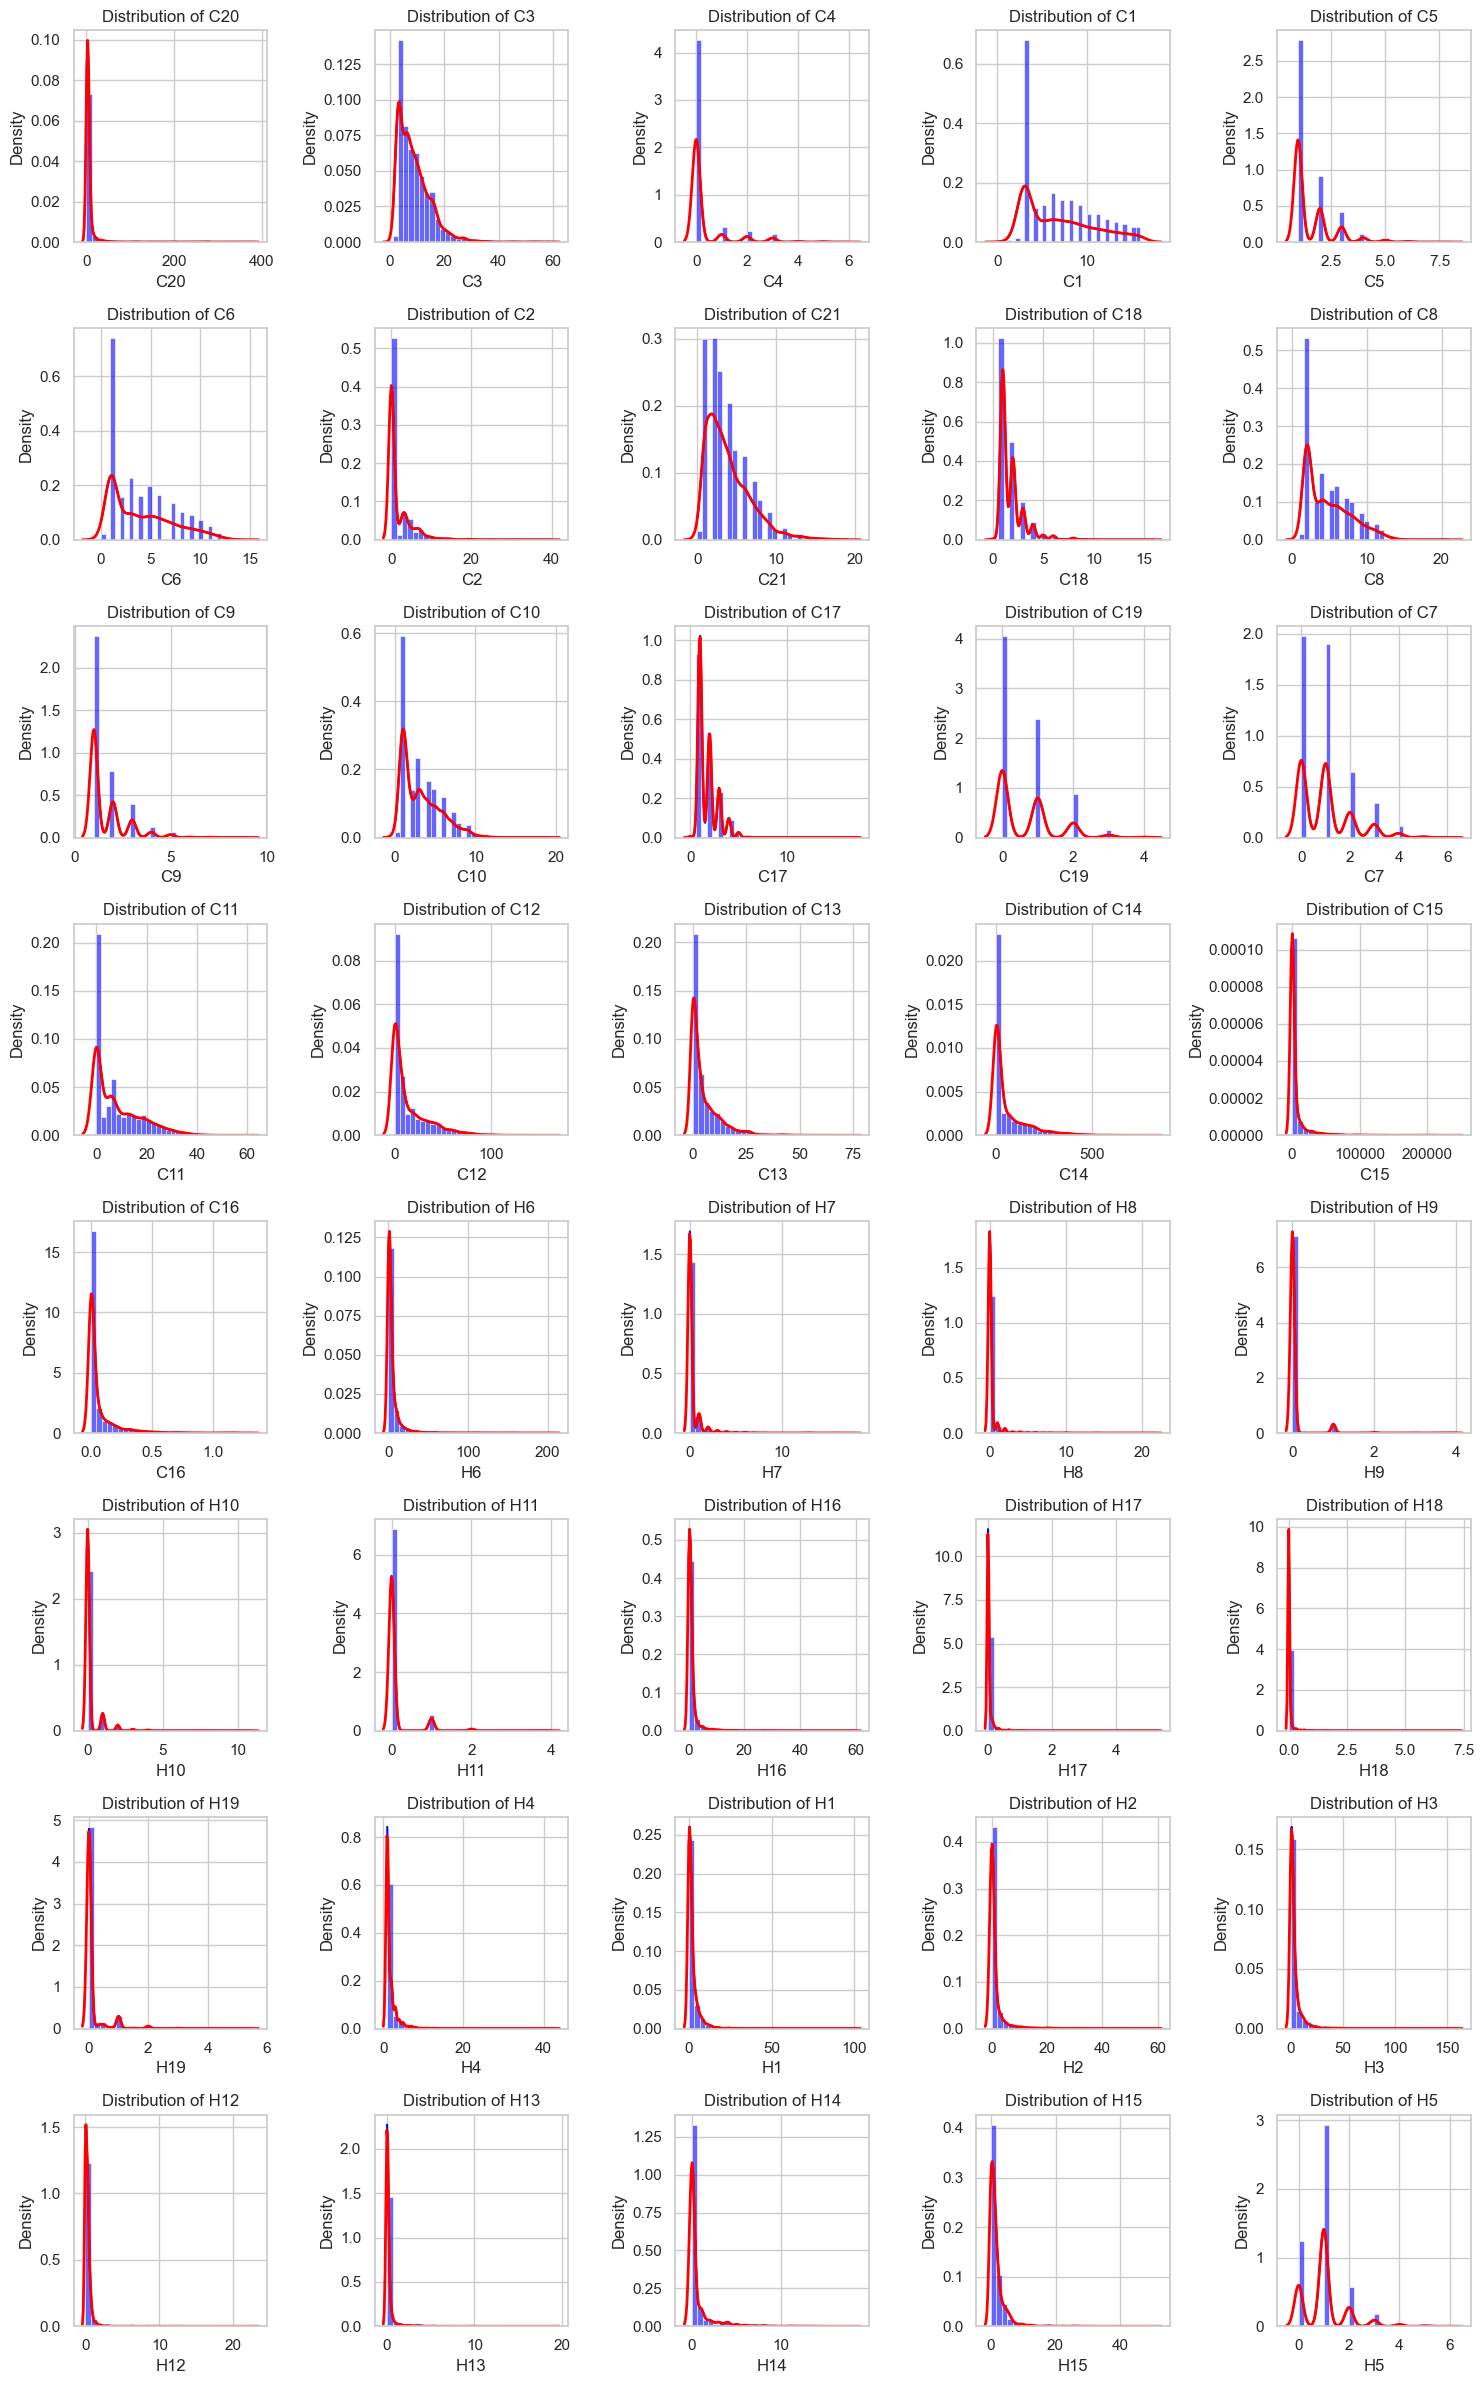

In [267]:
# Plot all distributions
plot_all_distributions(df_s)

In [268]:

# copy data
data_transform_s = data_s.copy()


# Apply a Box-Cox transformation to the variables with right-skewed distributions since following columns are not transform
# to symmetrical distribution by using logarithmic transformation.

# Import scipy
# from scipy import stats

# # Apply Box-Cox transformation to each variable
# for var in df_s.columns:
#     # Adding 1 to handle zero values
#     transformed, _ = stats.boxcox(data_transform_s[var] + 1)
#     data_transform_s[var] = transformed


# # Check the distribution after transformation
# data_transform_s[df_s.columns].hist(figsize=(20, 20))


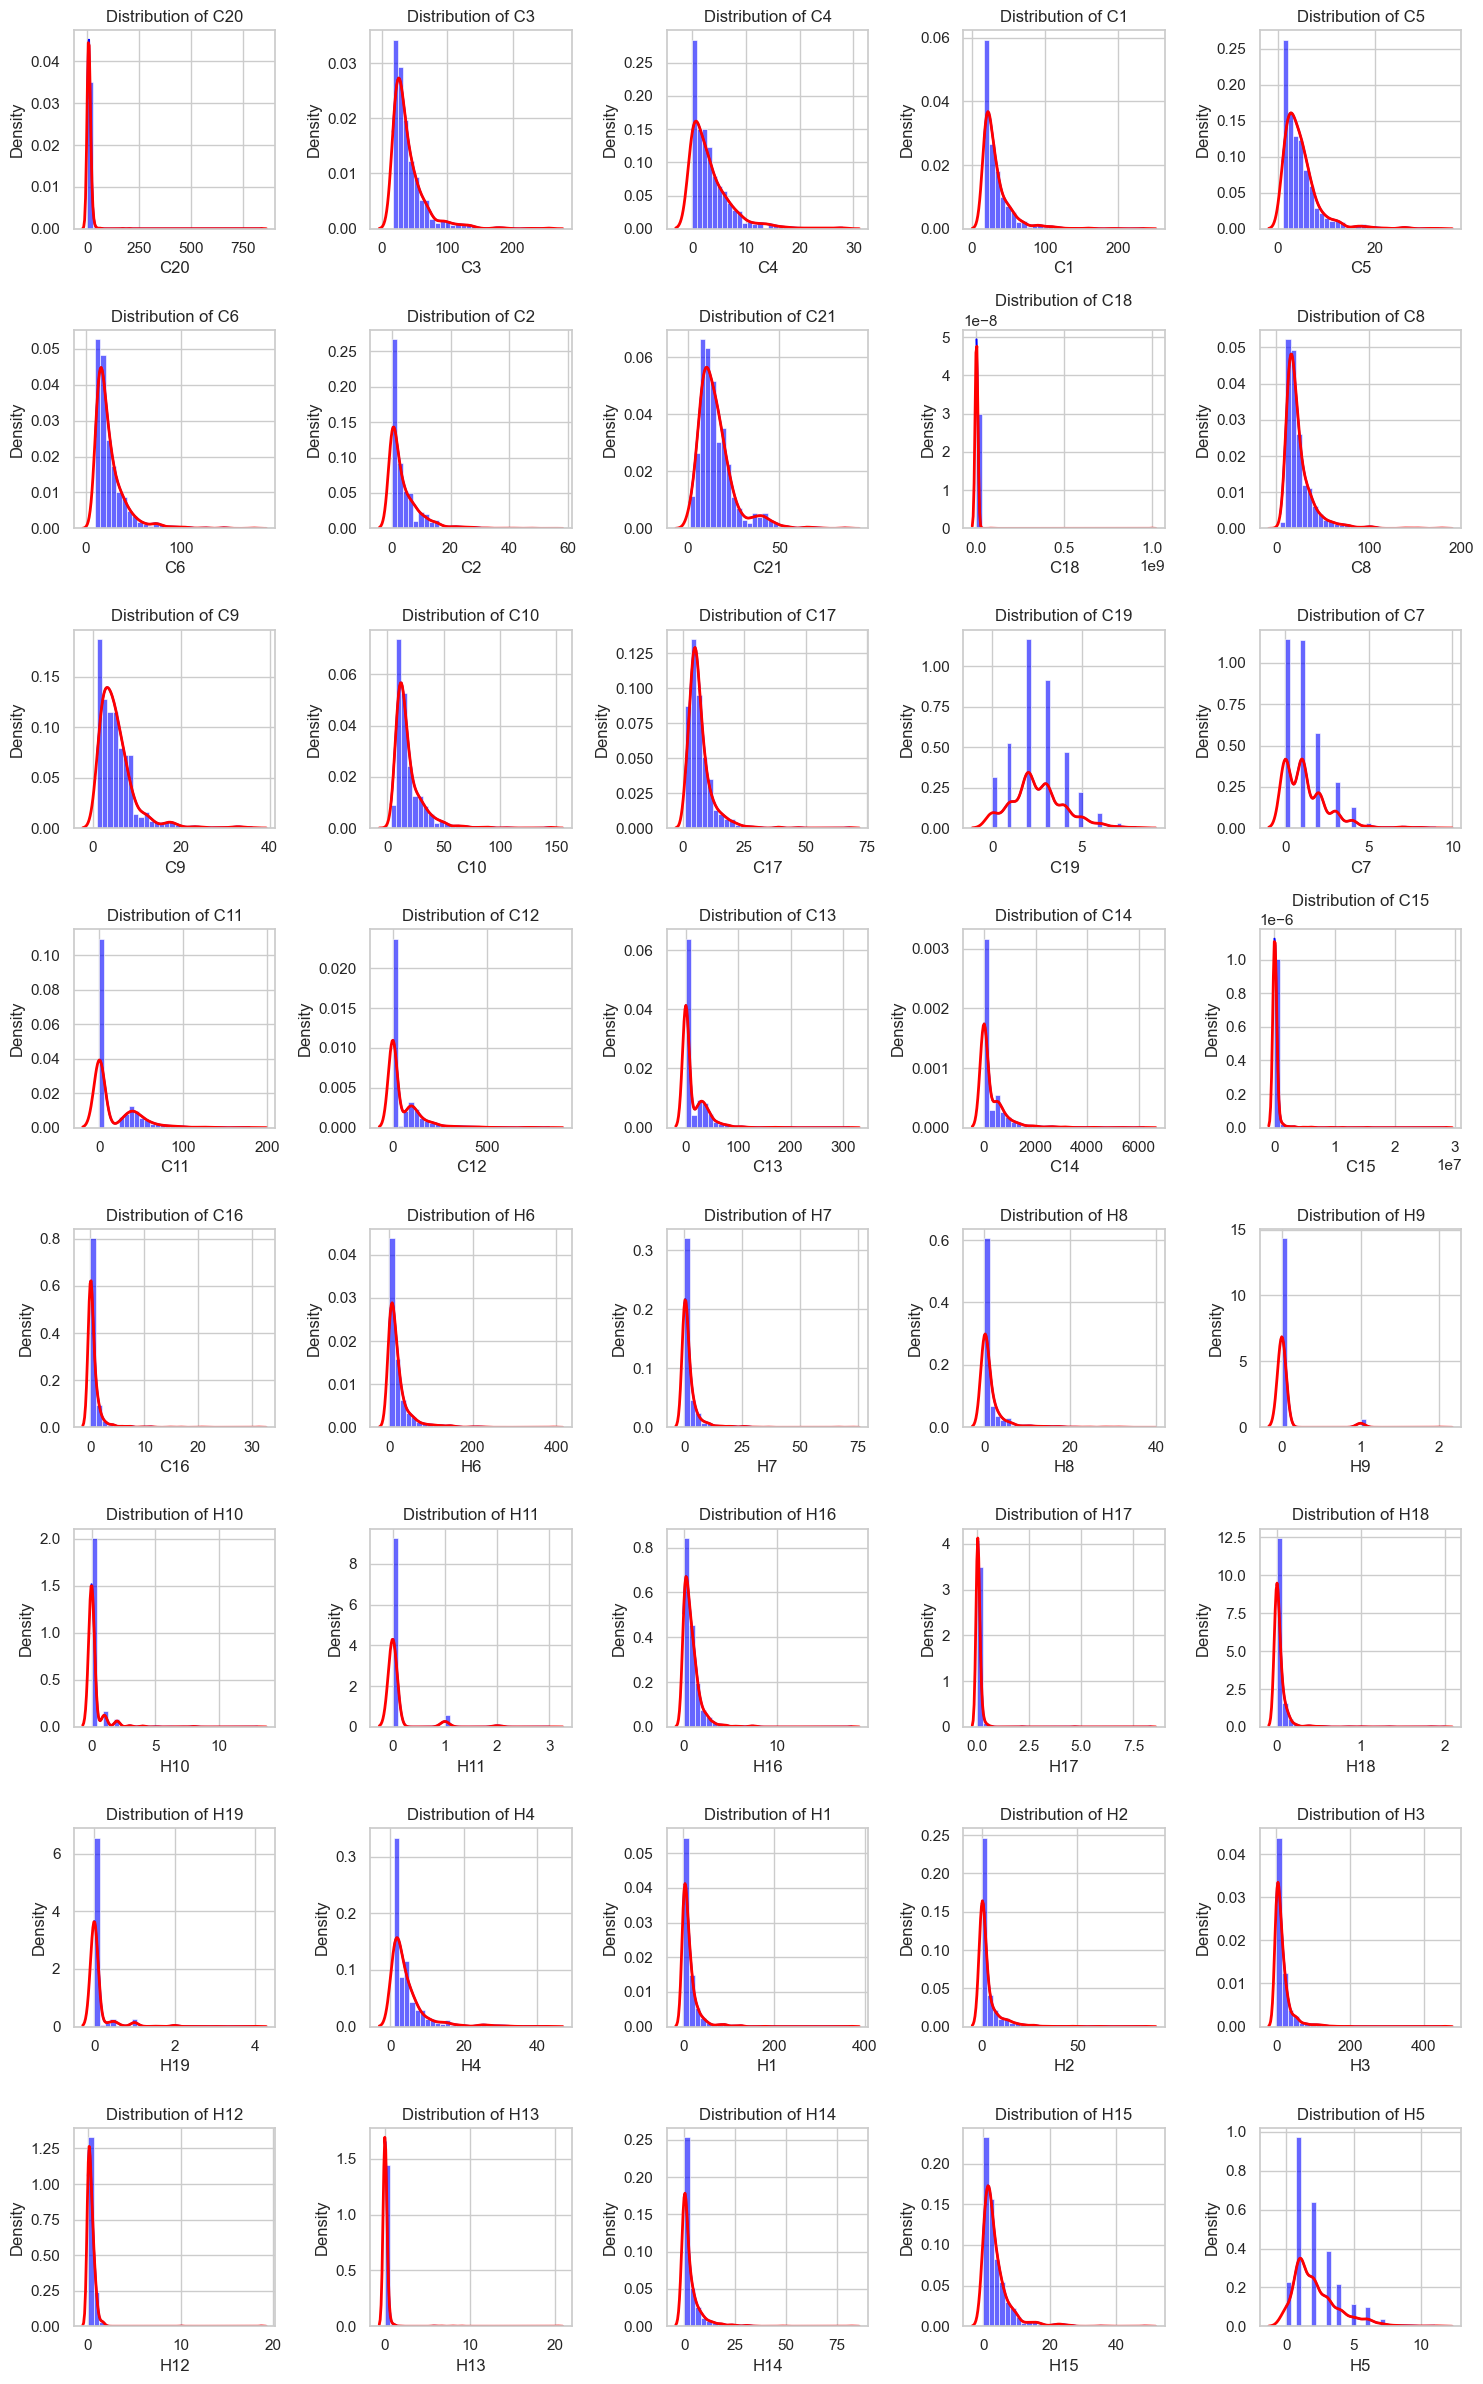

In [269]:
# Plot all distributions
plot_all_distributions(df_l)

In [270]:

# copy data
data_transform_l = data_l.copy()

# Apply a Box-Cox transformation to the variables with right-skewed distributions since following columns are not transform
# to symmetrical distribution by using logarithmic transformation.

# Import scipy
# from scipy import stats

# # Apply Box-Cox transformation to each variable
# for var in df_l.columns:
#     # Adding 1 to handle zero values
#     transformed, _ = stats.boxcox(data_transform_l[var] + 1)
#     data_transform_l[var] = transformed


# # Check the distribution after transformation
# data_transform_l[df_l.columns].hist(figsize=(20, 20))


In [271]:

# Convert 'bug-prone' column to 0 and 1
data_transform_s['bug-prone'] = data_transform_s['bug-prone'].apply(lambda x: 1 if x.strip() == 'bug-prone' else 0)
data_transform_l['bug-prone'] = data_transform_l['bug-prone'].apply(lambda x: 1 if x.strip() == 'bug-prone' else 0)

# Display the updated DataFrame
print(data_transform_s.head())  
print(data_transform_l.head()) 


                                         Method name  C20  C3  C4  C1  C5  C6  \
0  org.apache.activemq.transport.amqp.AmqpFramePa...    4  10   1   9   2   5   
1  org.apache.activemq.transport.amqp.AmqpHeader....    5   6   0   6   1   3   
2  org.apache.activemq.transport.amqp.AmqpHeader....    1  13   0  13   3   9   
3  org.apache.activemq.transport.amqp.AmqpInactiv...    1   5   0   5   1   3   
4  org.apache.activemq.transport.amqp.AmqpInactiv...    6   9   0   9   1   5   

   C2  C21  C18  ...  H4  H1  H2  H3       H12       H13       H14   H15  H5  \
0   0    2    4  ...   1   2   2   4  0.200000  0.200000  1.000000   4.0   1   
1   0    5    2  ...   1   1   3   4  0.333333  1.000000  0.333333   4.0   1   
2   0    9    3  ...   1  10   0  10  0.769231  0.000000  0.000000  10.0   1   
3   0    3    1  ...   1   2   0   2  0.400000  0.000000  0.000000   2.0   1   
4   0    4    3  ...   1   3   2   5  0.333333  0.222222  1.500000   5.0   1   

   bug-prone  
0          0  
1 

In [272]:
# Import libraries
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# split feature data and target data
feature_X_s = data_transform_s.drop(columns=['Method name','bug-prone'])
y_s = data_transform_s['bug-prone']

feature_X_l = data_transform_l.drop(columns=['Method name','bug-prone'])
y_l = data_transform_l['bug-prone']

In [273]:
# Import train_test_split library
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing sets (20%)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(feature_X_s, y_s, test_size=0.2, random_state=42)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(feature_X_l, y_l, test_size=0.2, random_state=42)

In [274]:
# StandardScaler performs Z-score standardization, which centers the data (mean = 0) 
# and scales it to unit variance (std = 1).
# The best practice is to apply the scaler only on the training set and then use the same transformation parameters to 
# scale the test set. 

from sklearn.preprocessing import StandardScaler

scaler_s = StandardScaler()
X_train_scaled_s = scaler_s.fit_transform(X_train_s)
X_test_scaled_s = scaler_s.transform(X_test_s)

scaler_l = StandardScaler()
X_train_scaled_l = scaler_l.fit_transform(X_train_l)
X_test_scaled_l = scaler_l.transform(X_test_l)


In [275]:
# from sklearn.feature_selection import SelectKBest, f_classif

# from sklearn.feature_selection import SelectKBest

# # Select features with p < 0.05
# selector_s = SelectKBest(score_func=f_classif, k='all')
# selector_s.fit(X_train_scaled_s, y_train_s)

# # Mask for features with p < 0.05
# significant_features_mask_s = selector_s.pvalues_ < 0.05
# X_train_scaled_s_significant = X_train_scaled_s[:, significant_features_mask_s]

# feature_names = feature_X_s.columns
# print("Selected features small:", feature_names[significant_features_mask_s])

# # Print unselected features
# print("Unselected features small:", feature_names[~significant_features_mask_s])



# # Select features with p < 0.05
# selector_l = SelectKBest(score_func=f_classif, k='all')
# selector_l.fit(X_train_scaled_l, y_train_l)

# # Mask for features with p < 0.05
# significant_features_mask_l = selector_l.pvalues_ < 0.05
# X_train_scaled_l_significant = X_train_scaled_l[:, significant_features_mask_l]

# # feature_names = feature_X_l.columns
# print("Selected features large:", feature_names[significant_features_mask_l])

# # Print unselected features
# print("Unselected features large:", feature_names[~significant_features_mask_l])





# feature_names = feature_X_s.columns

# # Convert NumPy arrays to DataFrames
# X_train_scaled_s_df = pd.DataFrame(X_train_scaled_s, columns=feature_names)
# X_train_scaled_l_df = pd.DataFrame(X_train_scaled_l, columns=feature_names)
# X_test_scaled_s_df = pd.DataFrame(X_test_scaled_s, columns=feature_names)
# X_test_scaled_l_df = pd.DataFrame(X_test_scaled_l, columns=feature_names)

# significant_features_s = ['C20', 'C3', 'C1', 'C5', 'C6', 'C2', 'C21', 'C18', 'C8', 'C9', 'C10',
#        'C17', 'C19', 'C11', 'C12', 'C14', 'C15', 'C16', 'H6', 'H7', 'H8',
#        'H11', 'H16', 'H17', 'H18', 'H4', 'H1', 'H2', 'H3', 'H12', 'H13', 'H14',
#        'H15', 'H5']
# significant_features_l = ['C20', 'C3', 'C4', 'C1', 'C5', 'C6', 'C2', 'C21', 'C18', 'C8', 'C9',
#        'C10', 'C17', 'C19', 'C7', 'C11', 'C12', 'C13', 'C14', 'C15', 'H6',
#        'H7', 'H8', 'H9', 'H11', 'H16', 'H17', 'H18', 'H19', 'H4', 'H1', 'H2',
#        'H3', 'H12', 'H13', 'H14', 'H15', 'H5']

# X_train_scaled_s_significant = X_train_scaled_s_df[significant_features_s]
# X_train_scaled_l_significant = X_train_scaled_l_df[significant_features_l]

# X_test_scaled_s = X_test_scaled_s_df[significant_features_s]
# X_test_scaled_l = X_test_scaled_l_df[significant_features_l]


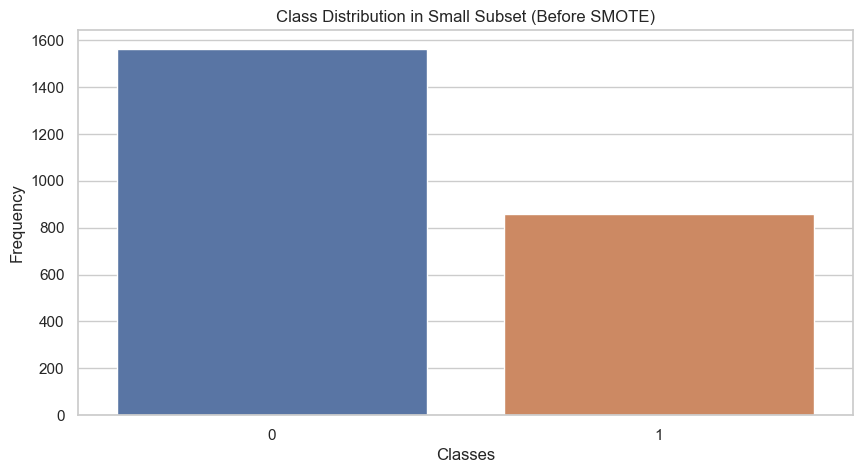

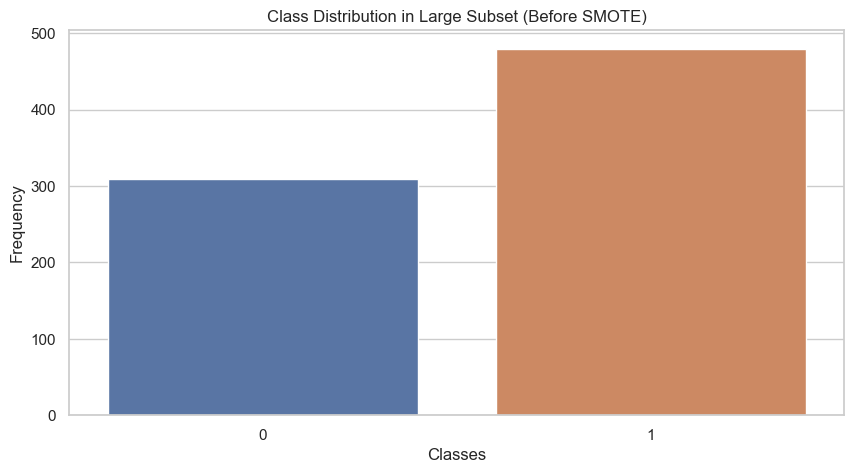

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution for small subset
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_s)
plt.title("Class Distribution in Small Subset (Before SMOTE)")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()

# Plot class distribution for large subset
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_l)
plt.title("Class Distribution in Large Subset (Before SMOTE)")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()


In [277]:
print("Small Subset Class Distribution:")
print(y_train_s.value_counts())

print("Large Subset Class Distribution:")
print(y_train_l.value_counts())


Small Subset Class Distribution:
bug-prone
0    1564
1     859
Name: count, dtype: int64
Large Subset Class Distribution:
bug-prone
1    480
0    309
Name: count, dtype: int64


In [278]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to small subset
X_train_resampled_s, y_train_resampled_s = smote.fit_resample(X_train_scaled_s, y_train_s)

# Apply SMOTE to large subset
X_train_resampled_l, y_train_resampled_l = smote.fit_resample(X_train_scaled_l, y_train_l)



In [279]:
print("Small Subset Class Distribution After SMOTE:")
print(pd.Series(y_train_resampled_s).value_counts())

print("Large Subset Class Distribution After SMOTE:")
print(pd.Series(y_train_resampled_l).value_counts())


Small Subset Class Distribution After SMOTE:
bug-prone
0    1564
1    1564
Name: count, dtype: int64
Large Subset Class Distribution After SMOTE:
bug-prone
0    480
1    480
Name: count, dtype: int64


In [280]:
X_train_s = X_train_scaled_s # X_train_resampled_s
y_train_s = y_train_s # y_train_resampled_s
X_test_s = X_test_scaled_s 
y_test_s = y_test_s

X_train_l = X_train_scaled_l # X_train_resampled_l
y_train_l = y_train_l # y_train_resampled_l
X_test_l = X_test_scaled_l 
y_test_l = y_test_l


In [281]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),  # For binary classification
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': make_scorer(roc_auc_score) # , needs_proba=True
}


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
bagging_classifier = BaggingClassifier(n_estimators=50, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
mlp_classifier = MLPClassifier(activation='tanh', hidden_layer_sizes=(100,), max_iter=2000, random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
hgb_classifier = HistGradientBoostingClassifier(random_state=42)
# rn_classifier = RadiusNeighborsClassifier()
xgb_classifier = XGBClassifier(eval_metric='logloss', random_state=42)


In [282]:
accuracy_s = []
precision_s = []
recall_s = []
f1_s = []
mcc_s = []
auc_s = []

def crossvalidate_fun_s(classifier, X_train, y_train):
    cv_results = cross_validate(classifier, X_train, y_train, cv=10, scoring=scoring)
    accuracy_s.append(cv_results['test_accuracy'].mean())
    precision_s.append(cv_results['test_precision'].mean())
    recall_s.append(cv_results['test_recall'].mean())
    f1_s.append(cv_results['test_f1'].mean())
    mcc_s.append(cv_results['test_mcc'].mean())
    auc_s.append(cv_results['test_auc'].mean())
    print(f"\nF1-Score: {cv_results['test_f1'].mean():.4f} ± {cv_results['test_f1'].std():.4f}")
    print(f"MCC: {cv_results['test_mcc'].mean():.4f} ± {cv_results['test_mcc'].std():.4f}")
    print(f"AUC: {cv_results['test_auc'].mean():.4f} ± {cv_results['test_auc'].std():.4f}")

crossvalidate_fun_s(rf_classifier,X_train_s, y_train_s)
# crossvalidate_fun_s(ada_classifier,X_train_s, y_train_s)
# crossvalidate_fun_s(bagging_classifier,X_train_s, y_train_s)
crossvalidate_fun_s(knn_classifier,X_train_s, y_train_s)
crossvalidate_fun_s(mlp_classifier,X_train_s, y_train_s)
crossvalidate_fun_s(gb_classifier,X_train_s, y_train_s)
# crossvalidate_fun_s(hgb_classifier,X_train_s, y_train_s)
# crossvalidate_fun_s(rn_classifier,X_train_s, y_train_s)
# crossvalidate_fun_s(xgb_classifier,X_train_s, y_train_s)

auc_s


F1-Score: 0.6769 ± 0.0348
MCC: 0.5075 ± 0.0476
AUC: 0.7509 ± 0.0261

F1-Score: 0.5582 ± 0.0455
MCC: 0.3556 ± 0.0619
AUC: 0.6687 ± 0.0300

F1-Score: 0.6211 ± 0.0425
MCC: 0.4303 ± 0.0584
AUC: 0.7102 ± 0.0305

F1-Score: 0.5749 ± 0.0408
MCC: 0.4101 ± 0.0650
AUC: 0.6855 ± 0.0274


[0.7509378081075303, 0.6686912223271542, 0.7101507022142746, 0.685488801949457]

In [283]:
accuracy_l = []
precision_l = []
recall_l = []
f1_l = []
mcc_l = []
auc_l = []

def crossvalidate_fun_l(classifier, X_train, y_train):
    cv_results = cross_validate(classifier, X_train, y_train, cv=10, scoring=scoring)
    accuracy_l.append(cv_results['test_accuracy'].mean())
    precision_l.append(cv_results['test_precision'].mean())
    recall_l.append(cv_results['test_recall'].mean())
    f1_l.append(cv_results['test_f1'].mean())
    mcc_l.append(cv_results['test_mcc'].mean())
    auc_l.append(cv_results['test_auc'].mean())
    print(f"\nF1-Score: {cv_results['test_f1'].mean():.4f} ± {cv_results['test_f1'].std():.4f}")
    print(f"MCC: {cv_results['test_mcc'].mean():.4f} ± {cv_results['test_mcc'].std():.4f}")
    print(f"AUC: {cv_results['test_auc'].mean():.4f} ± {cv_results['test_auc'].std():.4f}")

crossvalidate_fun_l(rf_classifier,X_train_l, y_train_l)
# crossvalidate_fun_l(ada_classifier,X_train_l, y_train_l)
# crossvalidate_fun_l(bagging_classifier,X_train_l, y_train_l)
crossvalidate_fun_l(knn_classifier,X_train_l, y_train_l)
crossvalidate_fun_l(mlp_classifier,X_train_l, y_train_l)
crossvalidate_fun_l(gb_classifier,X_train_l, y_train_l)
# crossvalidate_fun_l(hgb_classifier,X_train_l, y_train_l)
# crossvalidate_fun_l(rn_classifier,X_train_l, y_train_l)
# crossvalidate_fun_l(xgb_classifier,X_train_l, y_train_l)

auc_l


F1-Score: 0.8196 ± 0.0413
MCC: 0.5063 ± 0.1268
AUC: 0.7455 ± 0.0661

F1-Score: 0.7617 ± 0.0556
MCC: 0.3709 ± 0.1414
AUC: 0.6819 ± 0.0697

F1-Score: 0.7503 ± 0.0395
MCC: 0.3748 ± 0.1070
AUC: 0.6881 ± 0.0540

F1-Score: 0.8008 ± 0.0484
MCC: 0.4623 ± 0.1359
AUC: 0.7250 ± 0.0688


[0.7454905913978493, 0.681861559139785, 0.6880913978494623, 0.7249798387096774]

In [284]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import RadiusNeighborsClassifier

# Build models
models = {
    
    "RandomForest" :  RandomForestClassifier(n_estimators=100, random_state=42),
    # "AdaBoostClassifier" : AdaBoostClassifier(n_estimators=50, random_state=42),
    # "BaggingClassifier" : BaggingClassifier(n_estimators=50, random_state=42),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5),
    "MLPClassifier" : MLPClassifier(activation='tanh', hidden_layer_sizes=(100,), max_iter=2000, random_state=42),
    "GradientBoostingClassifier" : GradientBoostingClassifier(random_state=42),
    # "HistGradientBoostingClassifier" : HistGradientBoostingClassifier(random_state=42),
    # "RadiusNeighborsClassifier" : RadiusNeighborsClassifier(),
    # "XGBClassifier" : XGBClassifier(eval_metric='logloss', random_state=42)
}

print(f"Small")
probabilities_s = []
for name, model in models.items():
    # print(f"Training {name}...")
    # Train traditional ML models
    model.fit(X_train_s, y_train_s)
    y_pred_proba = model.predict_proba(X_test_s)[:, 1]
    probabilities_s.append(y_pred_proba)
    print(f"F1 ({name}): {f1_score(y_test_s, (y_pred_proba > 0.5).astype(int)):.4f}")


print(f"Large")
probabilities_l = []
for name, model in models.items():
    # print(f"Training {name}...")    
    # Train traditional ML models
    model.fit(X_train_l, y_train_l)
    y_pred_proba = model.predict_proba(X_test_l)[:, 1]
    probabilities_l.append(y_pred_proba)
    print(f"F1 ({name}): {f1_score(y_test_l, (y_pred_proba > 0.5).astype(int)):.4f}")




Small
F1 (RandomForest): 0.6877
F1 (KNeighborsClassifier): 0.5459
F1 (MLPClassifier): 0.6135
F1 (GradientBoostingClassifier): 0.5591
Large
F1 (RandomForest): 0.8434
F1 (KNeighborsClassifier): 0.7550
F1 (MLPClassifier): 0.7750
F1 (GradientBoostingClassifier): 0.8175


In [285]:
# Average probabilities for small group
avg_proba_s = np.mean(probabilities_s, axis=0)

# Average probabilities for large group
avg_proba_l = np.mean(probabilities_l, axis=0)


In [286]:
# Combine probabilities and ground truths
final_proba = np.concatenate((avg_proba_s, avg_proba_l), axis=0)
final_y_test = np.concatenate((y_test_s, y_test_l), axis=0)
final_pred = (final_proba >= 0.5).astype(int)

# Evaluate combined results
print("\nFinal Combined Results:")
print(f"Accuracy: {accuracy_score(final_y_test, final_pred):.2f}")
print(f"Precision: {precision_score(final_y_test, final_pred):.2f}")
print(f"Recall: {recall_score(final_y_test, final_pred):.2f}")
print(f"F1-Score: {f1_score(final_y_test, final_pred):.2f}")

# Final Combined Results:
# Accuracy: 0.75
# Precision: 0.70
# Recall: 0.71
# F1-Score: 0.70


Final Combined Results:
Accuracy: 0.76
Precision: 0.75
Recall: 0.65
F1-Score: 0.69


In [287]:
from sklearn.metrics import (
    roc_curve, roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, matthews_corrcoef
)

def get_optimal_threshold(y_true, y_proba):
    """
    Compute the optimal threshold using Youden's Index.
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    youden_index = tpr - fpr
    optimal_idx = np.argmax(youden_index)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

# Combine probabilities and ground truths for evaluation
final_proba = np.concatenate((avg_proba_s, avg_proba_l), axis=0)
final_y_test = np.concatenate((y_test_s, y_test_l), axis=0)

# Get optimal threshold using Youden's Index
optimal_threshold = get_optimal_threshold(final_y_test, final_proba)
print(f"Optimal Threshold using Youden's Index: {optimal_threshold:.4f}")

# Apply the optimal threshold for predictions
final_pred = (final_proba >= optimal_threshold).astype(int)

# Evaluate combined results
print("\nFinal Combined Results (Using Optimal Threshold):")
print(f"Accuracy: {accuracy_score(final_y_test, final_pred):.2f}")
print(f"Precision: {precision_score(final_y_test, final_pred):.2f}")
print(f"Recall: {recall_score(final_y_test, final_pred):.2f}")
print(f"F1-Score: {f1_score(final_y_test, final_pred):.2f}")
print(f"MCC: {matthews_corrcoef(final_y_test, final_pred):.2f}")
print(f"AUC: {roc_auc_score(final_y_test, final_proba):.2f}")

# Optimal Threshold using Youden's Index: 0.5132

# Final Combined Results (Using Optimal Threshold):
# Accuracy: 0.78
# Precision: 0.72
# Recall: 0.78
# F1-Score: 0.75
# MCC: 0.55
# AUC: 0.85

Optimal Threshold using Youden's Index: 0.3688

Final Combined Results (Using Optimal Threshold):
Accuracy: 0.75
Precision: 0.67
Recall: 0.81
F1-Score: 0.74
MCC: 0.52
AUC: 0.85


In [288]:
# Combine probabilities and ground truths for evaluation
final_proba = np.concatenate((avg_proba_s, avg_proba_l), axis=0)
final_y_test = np.concatenate((y_test_s, y_test_l), axis=0)

from sklearn.metrics import precision_recall_curve

def get_best_threshold_precision_recall(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores = np.nan_to_num(f1_scores)
    best_threshold = thresholds[np.argmax(f1_scores)]
    return best_threshold

best_threshold_pr = get_best_threshold_precision_recall(final_y_test, final_proba)
print(f"Optimal Threshold (Precision-Recall Curve): {best_threshold_pr:.4f}")

# Apply the optimal threshold for predictions
final_pred = (final_proba >= best_threshold_pr).astype(int)


# Evaluate combined results
print(f"Accuracy: {accuracy_score(final_y_test, final_pred):.2f}")
print(f"Precision: {precision_score(final_y_test, final_pred):.2f}")
print(f"Recall: {recall_score(final_y_test, final_pred):.2f}")
print(f"F1-Score: {f1_score(final_y_test, final_pred):.2f}")
print(f"MCC: {matthews_corrcoef(final_y_test, final_pred):.2f}")
print(f"AUC: {roc_auc_score(final_y_test, final_proba):.2f}")


# Optimal Threshold (Precision-Recall Curve): 0.5132
# Accuracy: 0.78
# Precision: 0.72
# Recall: 0.78
# F1-Score: 0.75
# MCC: 0.55
# AUC: 0.85


Optimal Threshold (Precision-Recall Curve): 0.2496
Accuracy: 0.72
Precision: 0.61
Recall: 0.93
F1-Score: 0.74
MCC: 0.51
AUC: 0.85


In [289]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
)
from scipy.stats import mode
import numpy as np

# Convert probabilities to binary predictions using threshold 
predictions_s = np.array([(probs > best_threshold_pr).astype(int) for probs in probabilities_s])
predictions_l = np.array([(probs > best_threshold_pr).astype(int) for probs in probabilities_l])


majority_vote_s = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions_s)
majority_vote_l = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions_l)

# Combine majority votes for evaluation
final_predictions = np.concatenate((majority_vote_s, majority_vote_l))
final_ground_truth = np.concatenate((y_test_s, y_test_l))

# Compute AUC using average probabilities
combined_probs = np.concatenate((avg_proba_s, avg_proba_l))

# Evaluate performance metrics
accuracy = accuracy_score(final_ground_truth, final_predictions)
precision = precision_score(final_ground_truth, final_predictions)
recall = recall_score(final_ground_truth, final_predictions)
f1 = f1_score(final_ground_truth, final_predictions)
mcc = matthews_corrcoef(final_ground_truth, final_predictions)
auc = roc_auc_score(final_ground_truth, combined_probs)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"AUC: {auc:.2f}")

# Accuracy: 0.76
# Precision: 0.71
# Recall: 0.74
# F1-Score: 0.72
# MCC: 0.51
# AUC: 0.85

Accuracy: 0.74
Precision: 0.65
Recall: 0.85
F1-Score: 0.73
MCC: 0.50
AUC: 0.85


In [290]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
)
import numpy as np


# AUC scores from cross-validation
auc_scores_s = auc_s
auc_scores_l = auc_l

# Normalize AUC scores to get weights
weights_s = [score / sum(auc_scores_s) for score in auc_scores_s]
weights_l = [score / sum(auc_scores_l) for score in auc_scores_l]

# Compute weighted average probabilities
combined_probs_s = np.sum([weight * probs for weight, probs in zip(weights_s, probabilities_s)], axis=0)
combined_probs_l = np.sum([weight * probs for weight, probs in zip(weights_l, probabilities_l)], axis=0)

# assert len(weights_s) == len(probabilities_s), "Mismatch between AUC weights and probability predictions."
# assert len(weights_l) == len(probabilities_l), "Mismatch between AUC weights and probability predictions."


from sklearn.metrics import precision_recall_curve

def get_best_threshold_precision_recall(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores = np.nan_to_num(f1_scores)
    best_threshold = thresholds[np.argmax(f1_scores)]
    return best_threshold

final_proba = np.concatenate((combined_probs_s, combined_probs_l), axis=0)
final_y_test = np.concatenate((y_test_s, y_test_l), axis=0)
best_threshold_pr = get_best_threshold_precision_recall(final_y_test, final_proba)



# Convert probabilities to binary predictions using threshold
predictions_s = (combined_probs_s > best_threshold_pr).astype(int)
predictions_l = (combined_probs_l > best_threshold_pr).astype(int)

# Combine predictions and ground truth
final_predictions = np.concatenate((predictions_s, predictions_l))
final_ground_truth = np.concatenate((y_test_s, y_test_l))

# Compute AUC using combined probabilities
combined_probs = np.concatenate((combined_probs_s, combined_probs_l))

# Evaluate performance metrics
accuracy = accuracy_score(final_ground_truth, final_predictions)
precision = precision_score(final_ground_truth, final_predictions)
recall = recall_score(final_ground_truth, final_predictions)
f1 = f1_score(final_ground_truth, final_predictions)
mcc = matthews_corrcoef(final_ground_truth, final_predictions)
auc = roc_auc_score(final_ground_truth, combined_probs)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"AUC: {auc:.2f}")

# Accuracy: 0.78
# Precision: 0.72
# Recall: 0.77
# F1-Score: 0.74
# MCC: 0.55
# AUC: 0.85

Accuracy: 0.72
Precision: 0.61
Recall: 0.92
F1-Score: 0.74
MCC: 0.51
AUC: 0.85


In [291]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
)
import numpy as np

# accuracy_l = []
# precision_l = []
# recall_l = []
# f1_l = []
# mcc_l = []
# auc_l = []

# AUC scores from cross-validation
scores_s = f1_s
scores_l = f1_l

# Normalize AUC scores to get weights
weights_s = [score / sum(scores_s) for score in scores_s]
weights_l = [score / sum(scores_l) for score in scores_l]

# Compute weighted average probabilities
combined_probs_s = np.sum([weight * probs for weight, probs in zip(weights_s, probabilities_s)], axis=0)
combined_probs_l = np.sum([weight * probs for weight, probs in zip(weights_l, probabilities_l)], axis=0)


from sklearn.metrics import precision_recall_curve

def get_best_threshold_precision_recall(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores = np.nan_to_num(f1_scores)
    best_threshold = thresholds[np.argmax(f1_scores)]
    return best_threshold

final_proba = np.concatenate((combined_probs_s, combined_probs_l), axis=0)
final_y_test = np.concatenate((y_test_s, y_test_l), axis=0)
best_threshold_pr = get_best_threshold_precision_recall(final_y_test, final_proba)


# Convert probabilities to binary predictions using threshold
predictions_s = (combined_probs_s > best_threshold_pr).astype(int)
predictions_l = (combined_probs_l > best_threshold_pr).astype(int)

# Combine predictions and ground truth
final_predictions = np.concatenate((predictions_s, predictions_l))
final_ground_truth = np.concatenate((y_test_s, y_test_l))

# Compute AUC using combined probabilities
combined_probs = np.concatenate((combined_probs_s, combined_probs_l))

# Evaluate performance metrics
accuracy = accuracy_score(final_ground_truth, final_predictions)
precision = precision_score(final_ground_truth, final_predictions)
recall = recall_score(final_ground_truth, final_predictions)
f1 = f1_score(final_ground_truth, final_predictions)
mcc = matthews_corrcoef(final_ground_truth, final_predictions)
auc = roc_auc_score(final_ground_truth, combined_probs)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"AUC: {auc:.2f}")



Accuracy: 0.72
Precision: 0.61
Recall: 0.92
F1-Score: 0.74
MCC: 0.51
AUC: 0.85
